# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Este proyecto tiene como objetivo comprender en profundidad el comportamiento de los usuarios en relación con los consumos asociados a los planes de telefonía "Surf" y "Ultimate". El propósito final es identificar cuál de estos planes contribuye de manera más significativa a los ingresos de la compañía.

Para llevar a cabo este análisis, se implementará un enfoque metodológico estructurado que comenzará con una exhaustiva exploración de los datos disponibles. En esta fase inicial, se verificará la integridad de los datos, asegurando que no existan valores faltantes y que los tipos de datos sean correctos. Además, se considerará la posibilidad de integrar datos adicionales que puedan enriquecer el análisis y facilitar su manipulación en etapas posteriores.

Una vez garantizada la calidad de los datos, se procederá a una recopilación sistemática de la información mensual por usuario, organizándola en distintos DataFrames específicos para cada plan de telefonía. Posteriormente, se consolidarán los datos más relevantes en un único DataFrame central, sobre el cual se realizarán análisis descriptivos y se generarán diversas visualizaciones gráficas. Estas visualizaciones permitirán identificar patrones de consumo y, finalmente, determinar cuál de los dos planes genera mayores ingresos para la empresa.

El análisis resultante no solo proporcionará una visión clara y cuantitativa del rendimiento de cada plan, sino que también ofrecerá insights valiosos para la toma de decisiones estratégicas en la gestión de productos y la optimización de las ofertas comerciales.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_megaline_calls = pd.read_csv( '/datasets/megaline_calls.csv' )

df_megaline_internet = pd.read_csv( '/datasets/megaline_internet.csv' )

df_megaline_messages = pd.read_csv( '/datasets/megaline_messages.csv' )

df_megaline_plans = pd.read_csv( '/datasets/megaline_plans.csv' )

df_megaline_users = pd.read_csv( '/datasets/megaline_users.csv' )


## Preparar los datos

Este es un paso crucial, ya que de su correcta ejecución depende la calidad de los datos con los que se trabajará, y, por lo tanto, la fiabilidad y precisión de los resultados que se obtendrán. Un análisis riguroso en esta fase garantiza que las conclusiones derivadas sean sólidas y basadas en datos de alta calidad, lo que es fundamental para tomar decisiones bien informadas.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En este caso los datos proporcionados están correctos y listos para ser analizados, no hay nada que corregir 

## Corregir datos

In [5]:
#Nada que corregir

## Enriquecer los datos

In [6]:
#Nada que agregar par enriquecer los datos

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

df_megaline_users.sample( 10 )

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
351,1351,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",2018-09-05,ultimate,NaN
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
261,1261,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,surf,NaN
394,1394,Alejandro,Carver,28,"Stockton, CA MSA",2018-01-16,surf,NaN
130,1130,Clarence,Cunningham,27,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-05-17,surf,NaN
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN


En este caso, los datos son correctos en su mayoría, con la excepción de las columnas `reg_date` y `churn_date`, las cuales presentan un tipo de dato incorrecto. Es necesario convertir estas columnas al tipo `datetime` para asegurar que las fechas se manejen correctamente en los análisis posteriores. Esta conversión es esencial para garantizar la integridad del análisis temporal y para evitar posibles errores en la interpretación de los datos.

### Corregir los datos

Para corregir los datos bastará con aplicar el metodo .to_datetime en ambas columnas

In [9]:
#Corrección del tipado de la fecha

df_megaline_users[ "reg_date" ] = pd.to_datetime( df_megaline_users[ "reg_date" ], format = "%Y-%m-%d" )

df_megaline_users[ "churn_date" ] = pd.to_datetime( df_megaline_users[ "churn_date" ], format = "%Y-%m-%d" )

### Enriquecer los datos

Para optimizar la manipulación de datos en etapas posteriores del análisis, se añadirán dos nuevas columnas a este DataFrame:

- **`reg_month`**: Esta columna contendrá el mes de registro del usuario, que será extraído a partir de la fecha de registro en la columna `reg_date`.
- **`area`**: Esta columna almacenará la región o área del usuario, la cual será derivada de la columna `city`.

Estas adiciones facilitarán un análisis más eficiente y permitirán realizar agrupaciones y filtrados de manera más intuitiva.

In [10]:
df_megaline_users[ "reg_month" ] = df_megaline_users[ "reg_date" ].dt.month

df_megaline_users[ "area" ] = df_megaline_users[ "city" ].apply( lambda city: city.split( " " )[-2] )


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas

df_megaline_calls.sample( 10 )

,id,user_id,call_date,duration
117356,1410_343,1410,2018-10-13,6.04
91264,1329_7,1329,2018-12-08,5.72
24103,1090_283,1090,2018-09-20,0.00
10497,1046_363,1046,2018-06-29,13.11
41509,1153_178,1153,2018-08-12,8.71
16364,1064_222,1064,2018-07-08,0.00
134965,1490_65,1490,2018-09-12,0.19
5518,1027_61,1027,2018-11-22,17.32
43853,1159_449,1159,2018-12-16,5.92
121565,1427_233,1427,2018-08-17,19.11


En el conjunto de datos, se observa que la columna `duration` contiene varios registros con un valor de `0.00` minutos. Estos valores probablemente corresponden a llamadas que no fueron respondidas. 

Dado que vamos a calcular algunos promedios, es aconsejable eliminar estos registros con duración de `0.00` minutos para evitar posibles sesgos en los resultados. Además, es importante corregir el tipo de dato de la columna de fechas para asegurar que el análisis sea preciso y consistente.

### Corregir los datos

**Acciones a tomar:**
1. **Eliminar los registros con duración de `0.00` minutos** para evitar distorsiones en los cálculos de promedios.
2. **Corregir el tipo de dato de las columnas de fecha** para asegurar una correcta manipulación y análisis temporal.

Estas acciones asegurarán la calidad y precisión del análisis subsiguiente.

In [13]:
# Eliminar registros con una duración de 0
df_megaline_calls = df_megaline_calls[ ~(df_megaline_calls[ "duration" ] == 0) ]

In [14]:
# Corregimos el tipado de la fecha con ayuda de to_datetime()
df_megaline_calls[ "call_date" ] = pd.to_datetime( df_megaline_calls[ "call_date" ], format = "%Y-%m-%d" )

### Enriquecer los datos

Para optimizar el estudio de los datos, se añadirán dos nuevas columnas al DataFrame:

1. **`month`**: Esta columna almacenará el mes de la fecha de la llamada, como su nombre indica. Esto facilitará el análisis temporal y permitirá agrupar las llamadas por mes.

2. **`real_minutes`**: **Esta columna contendrá la duración de las llamadas en minutos, redondeada según los estándares de Megaline.** Esta información será crucial para cálculos precisos de ingresos y para realizar agrupaciones de datos más significativas.

In [15]:
# La función redondeo se encarga de redondear al número superior inmediato
def redondeo( num ):
    if num == 0 :
        return int( num )
    elif num % 1 != 0:
        return int( num ) + 1
    else:
        return int( num )

# Crear una columna month para almacenar el mes de la llamada
df_megaline_calls[ "month" ] = df_megaline_calls[ "call_date" ].dt.month

###############################################################################################################################################
# En esta linea de código se realiza el redondeo de los minutos utilizando la funcion redondeo() que se declara al inicio del bloque###########
###############################################################################################################################################
df_megaline_calls[ "real_minutes" ] = df_megaline_calls[ "duration" ].apply( redondeo )


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes

df_megaline_messages.sample( 10 )


,id,user_id,message_date
32263,1199_539,1199,2018-11-26
50119,1328_1077,1328,2018-06-11
66194,1433_134,1433,2018-11-17
29970,1187_78,1187,2018-05-10
68410,1441_4,1441,2018-11-21
69518,1451_215,1451,2018-11-29
70235,1456_166,1456,2018-12-20
7592,1059_475,1059,2018-10-06
22966,1137_491,1137,2018-10-20
56269,1355_403,1355,2018-10-24


Al igual que los conjuntos de datos anteriores la fecha está con un tipado incorrecto.

### Corregir los datos

Es necesario corregir el tipo de dato de la columna `message_date` para asegurar que se maneje adecuadamente como una fecha. Esta corrección es fundamental para realizar análisis temporales precisos y para evitar problemas en la manipulación de los datos relacionados con fechas.

In [18]:
# Corregimos el tipado de la fecha con ayuda de to_datetime()

df_megaline_messages[ "message_date" ] = pd.to_datetime( df_megaline_messages[ "message_date" ], format = "%Y-%m-%d" )

### Enriquecer los datos

Al igual que en el análisis previo, se añadirá la columna `month` para facilitar la agrupación y el análisis de los datos en etapas posteriores. Esta columna permitirá segmentar los datos por mes, simplificando así el análisis temporal y la generación de informes detallados.

In [19]:
# Crear una columna month para almacenar el mes de la llamada

df_megaline_messages[ "month" ] = df_megaline_messages[ "message_date" ].dt.month


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet

df_megaline_internet.sample( 10 )

,id,user_id,session_date,mb_used
95730,1446_273,1446,2018-11-25,280.72
66235,1308_14,1308,2018-12-06,356.30
10479,1054_11,1054,2018-07-12,160.09
97537,1460_78,1460,2018-06-07,100.49
25605,1120_108,1120,2018-05-21,383.68
74331,1348_399,1348,2018-10-28,0.00
7716,1041_556,1041,2018-08-18,434.74
101608,1486_348,1486,2018-12-18,888.21
78447,1366_136,1366,2018-12-29,0.00
78119,1364_219,1364,2018-09-25,903.15


En este conjunto de datos, se observa que la columna `mb_used` contiene registros con un valor de `0.00` MB. De manera similar a lo ocurrido con el conjunto de llamadas, estos valores probablemente representan datos no significativos. Para evitar que estos registros introduzcan sesgos en los análisis futuros, se eliminarán.

Además, es necesario corregir el tipo de dato de las fechas en este conjunto, de manera consistente con los conjuntos de datos anteriores. Esta corrección garantizará una adecuada manipulación y análisis temporal de los datos.

### Corregir los datos

Para asegurar la calidad de los datos en este conjunto, se realizarán las siguientes acciones:

1. **Eliminar los registros con `0.00` MB en la columna `mb_used`**: Estos valores representan datos no significativos y su eliminación ayudará a prevenir sesgos en el análisis.

2. **Corregir el tipo de dato de las fechas**: Asegurarse de que las columnas de fechas estén correctamente tipadas es crucial para una manipulación y análisis precisos.

In [22]:
# Eliminar registros con una duración de 0
df_megaline_internet = df_megaline_internet[ ~(df_megaline_internet[ "mb_used" ] == 0) ]

In [23]:
# Corregimos el tipado de la fecha con ayuda de to_datetime()

df_megaline_internet[ "session_date" ] = pd.to_datetime( df_megaline_internet[ "session_date" ], format = "%Y-%m-%d" )

### Enriquecer los datos

Al igual que en los conjuntos de datos anteriores, se añadirá la columna `month` a este conjunto. Esta columna permitirá almacenar el mes correspondiente a cada fecha en el campo relevante, facilitando así la agrupación y el análisis temporal de los datos.

La adición de esta columna ayudará a mejorar la organización de los datos y simplificará las operaciones de agrupamiento y análisis en etapas posteriores.

In [24]:
# Crear una columna month para almacenar el mes de la llamada

df_megaline_internet[ "month" ] = df_megaline_internet[ "session_date" ].dt.month

## Estudiar las condiciones de las tarifas

Para proceder con el análisis, es crucial revisar las tarifas y la metodología de cobro de excedentes de cada plan que aplica Megaline. Esta revisión permitirá realizar cálculos de ingresos más precisos en etapas posteriores del análisis.

**Acciones a realizar:**
1. **Revisar las tarifas de cada plan**: Asegurarse de entender cómo se aplican las tarifas base y los cargos adicionales.
2. **Analizar la política de cobro de excedentes**: Comprender cómo Megaline cobra por los excedentes en cada plan (por ejemplo, minutos o MB adicionales).

Esta información es esencial para calcular los ingresos de manera precisa y para realizar un análisis detallado de la rentabilidad de cada plan.

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# Se crea la funcion impTarifa() para no repetir el código 2 veces.
def impTarifa( name, cost, mins, sms, gb, min_ad, sms_ad, gb_ad ):
    print( name )
    print( f"1.- Pago mensual: {cost}$" )
    print( f"2.- {mins} minutos al mes, {sms} SMS y {gb} GB de datos." )
    print( "3.- Si se exceden los límites del paquete:" )
    print( f"\t-1 minuto: {min_ad} centavos." )
    print( f"\t-1 sms: {sms_ad} centavos." )
    print( f"\t-1 GB de datos: {gb_ad}$\n" )

impTarifa( "Surf", 20, 500, 50, 15, 3, 3, 10 )
impTarifa( "Ultimate", 70, 3000, 1000, 30, 1, 1, 7 )

print("""
1.- Megaline redondea los segundos a minutos y los megabytes a gigabytes. 
2. -Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. 
3.- Para tráfico web, las sesiones web individuales no se redondean.En vez de esto, el total del mes se redondea hacia arriba
""")

Surf
1.- Pago mensual: 20$
2.- 500 minutos al mes, 50 SMS y 15 GB de datos.
3.- Si se exceden los límites del paquete:
	-1 minuto: 3 centavos.
	-1 sms: 3 centavos.
	-1 GB de datos: 10$

Ultimate
1.- Pago mensual: 70$
2.- 3000 minutos al mes, 1000 SMS y 30 GB de datos.
3.- Si se exceden los límites del paquete:
	-1 minuto: 1 centavos.
	-1 sms: 1 centavos.
	-1 GB de datos: 7$


1.- Megaline redondea los segundos a minutos y los megabytes a gigabytes. 
2. -Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. 
3.- Para tráfico web, las sesiones web individuales no se redondean.En vez de esto, el total del mes se redondea hacia arriba



## Agregar datos por usuario

A continuación, se agruparán los registros por usuario y por mes para cada tipo de consumo (llamadas, minutos, mensajes y GB). Esta agrupación se realizará en DataFrames separados para cada tipo de consumo. Posteriormente, se consolidarán estos DataFrames en uno solo, que contendrá toda la información necesaria para calcular los ingresos.

**Pasos a seguir:**
1. **Agrupar por usuario y por mes**: Realizar la agrupación de los datos de llamadas, minutos, mensajes y GB en DataFrames individuales.
2. **Consolidar los DataFrames**: Unir los DataFrames agrupados en un único DataFrame que reúna toda la información requerida para el cálculo de ingresos.

Este proceso permitirá tener una visión integral del consumo de cada usuario y facilitará el cálculo preciso de los ingresos generados por cada plan.

In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls = df_megaline_calls.groupby( by = ["user_id", "month" ], as_index = False ).count()

# Se modifica df_calls para conservar solo las 3 columnas importantes "user_id", "month" y "call_date" ( contiene el número de llamadas totales por usuario al mes)
df_calls = df_calls[ ["user_id", "month", "call_date"] ]

#Ahora se renombra la columna "call_date" por algo con más sentido como "total_calls"
df_calls.rename( columns = { "call_date" : "total_calls" }, inplace = True )

df_calls

,user_id,month,total_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_minutes = df_megaline_calls.groupby( by = ["user_id", "month" ], as_index = False ).sum()

# Se modifica df_minutes para conservar solo las 3 columnas importantes "user_id", "month" y "real_minutes" ( contiene el número de minutos totales por usuario al mes)
df_minutes = df_minutes[ ["user_id", "month", "real_minutes"] ]

#Ahora se renombra la columna "call_date" por algo con más sentido como "total_calls"
df_minutes.rename( columns = { "real_minutes" : "total_minutes" }, inplace = True )

df_minutes

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2251,1498,12,339
2252,1499,9,346
2253,1499,10,385
2254,1499,11,308


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_sms = df_megaline_messages.groupby( by = ["user_id", "month" ], as_index = False ).count()

# Se modifica df_sms para conservar solo las 3 columnas importantes "user_id", "month" y "message_date" ( contiene el número de mensajes totales por usuario al mes)
df_sms = df_sms[ ["user_id", "month", "message_date"] ]

#Ahora se renombra la columna "message_date" por algo con más sentido como "total_messages"
df_sms.rename( columns = { "message_date" : "total_messages" }, inplace = True )

df_sms

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


En el caso del DataFrame `df_gb`, se realizará un paso adicional para ajustar los valores de GB cobrados a los usuarios. Dado que Megaline tiene un método específico para redondear el consumo de MB al final del mes, se creará una función para redondear los GB de acuerdo con esta política de cobro.

**Pasos a seguir:**
1. **Crear una función de redondeo**: Desarrollar una función que aplique la política de redondeo de Megaline para ajustar el consumo de GB a los valores facturables.
2. **Aplicar la función al DataFrame**: Utilizar esta función para redondear los valores de GB en el DataFrame `df_gb`, asegurando que refleje el consumo real facturado.

Este paso garantizará que los cálculos de ingresos sean precisos y estén alineados con las políticas de facturación de Megaline.

In [29]:
#############################################################################################################
# La función calculateGb() es utilizada para redondear y calcular los gb que se van a cobrar a cada usuario #
# en función de los mb que consumieron en el mes                                                            #
#############################################################################################################
def calculateGb( mb ):
    #Primero calculamos la cantidad exacta de gb consumidos por el usuario con una división entera
    gb = mb // 1024
    # despues se calcula el residuo de dividir por 1024(1GB) a los mb consumidos por el usuario, de esta manera 
    # si el residuo es mayor que 0 significa que el usuario ha consumido mb adicionales y entonces tal como indican las
    # especificaciones del proyecto se le cobrará 1GB completo al usuario
    # por eso se suma 1 a los gb que se obtuvieron en ladivisión entera.
    if (mb % 1024) > 0:
        gb += 1
    return gb

# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_gb = df_megaline_internet.groupby( by = ["user_id", "month" ], as_index = False ).sum()

# Se modifica df_gb para conservar solo las 3 columnas importantes "user_id", "month" y "mb_used" ( contiene el número de mg totales por usuario al mes)
df_gb = df_gb[ ["user_id", "month", "mb_used"] ]

#######################################################################################################
# Con ayuda de la funcion calculateGb() se convertirán los mb a gb utilizando el criterio de megaline #
#######################################################################################################
df_gb[ "mb_used" ] = df_gb[ "mb_used" ].apply( calculateGb )

#Ahora se renombra la columna "mb_used" por algo con más sentido como "total_gb"
df_gb.rename( columns = { "mb_used" : "total_gb" }, inplace = True )

df_gb


,user_id,month,total_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


Ahora se procederá a unir todos los DataFrames creados hasta este momento en uno solo, denominado `df_total_values`.

**Nota:** Al unir los DataFrames, es posible que se generen registros con valores `NaN`, ya que algunos usuarios podrían no haber utilizado minutos, SMS o GB en ciertos meses. Estos valores `NaN` serán reemplazados por `0` para asegurar la integridad y continuidad del análisis.

**Pasos a seguir:**
1. **Unir los DataFrames**: Combinar los DataFrames agrupados en un único DataFrame llamado `df_total_values`.
2. **Reemplazar valores `NaN`**: Sustituir los valores `NaN` por `0` para los registros que no tienen consumo en ciertos meses.

Este proceso consolidará la información necesaria para calcular los ingresos y facilitará el análisis global del consumo de los usuarios.

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_total_values = pd.merge( df_calls, df_minutes, on = ["user_id", "month"], how = "outer")

df_total_values = pd.merge( df_total_values, df_sms, on = ["user_id", "month"], how = "outer")

df_total_values = pd.merge( df_total_values, df_gb, on = ["user_id", "month"], how = "outer")

#Se reemplazan los valores NaN con 0
df_total_values = df_total_values.fillna( 0 )

df_total_values

,user_id,month,total_calls,total_minutes,total_messages,total_gb
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,22.0,182.0,30.0,7.0
2,1001,9,38.0,315.0,44.0,14.0
3,1001,10,47.0,393.0,53.0,22.0
4,1001,11,49.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1407,11,0.0,0.0,1.0,1.0
2289,1482,10,0.0,0.0,2.0,0.0
2290,1094,10,0.0,0.0,0.0,2.0
2291,1108,12,0.0,0.0,0.0,1.0


In [31]:
# Añade la información de la tarifa
df_total_values = pd.merge( df_total_values, df_megaline_users[ ["user_id", "plan", "reg_month", "area" ] ], on = "user_id")
# df_total_values.rename( columns = { "plan" : "plan_name" }, inplace = True )
# df_total_values = pd.merge( df_total_values, df_megaline_plans, on = "plan_name" )

Para completar la preparación del DataFrame que contendrá todos los datos necesarios para el análisis, se añadirá la columna de ingreso generado por cada usuario cada mes. 

**Pasos a seguir:**
1. **Crear una función de cálculo de ingresos**: Esta función realizará las siguientes operaciones:
   - **Calcular el consumo total**: Restar los minutos, SMS y GB incluidos en el plan del usuario del total consumido al final del mes.
   - **Calcular los excedentes**: Aplicar la política de cobro de excedentes para minutos, SMS y GB, según el plan del usuario.
   - **Determinar el ingreso**: Sumar los cargos por excedentes para obtener el ingreso total generado por el usuario en ese mes.

2. **Aplicar la función al DataFrame**: Añadir la columna de ingreso a `df_total_values` utilizando esta función, asegurando que refleje con precisión el monto que cada usuario generó basado en su consumo y el plan contratado.

Este paso permitirá calcular los ingresos de manera precisa y completa, facilitando el análisis del rendimiento financiero de los planes ofrecidos por Megaline.

In [32]:
# Calcula el ingreso mensual para cada usuario
# La función montlhyIncome es usada para calcular los ingresos mesuales por usuario en función del tipo de plan que tienen
def monthlyIncome( user ):
    plan = user[ "plan" ]
    tarifa = df_megaline_plans.query( "plan_name == @plan" )
    sms_inc, mb_inc, mins_inc, usd_pay, usd_gb, usd_sms, usd_min, x = tarifa.values[0]
    minutes = user[ "total_minutes" ] - mins_inc
    sms = user[ "total_messages" ] - sms_inc
    gb = user[ "total_gb" ] - (mb_inc / 1024) 
    
    if minutes < 0:
        minutes = 0
    if sms < 0:
        sms = 0
    if gb < 0:
        gb = 0
    return ( ( minutes * usd_min ) + ( sms * usd_sms ) + ( gb * usd_gb ) + usd_pay )


df_total_values[ "income" ] = df_total_values.apply( monthlyIncome, axis = 1 )

df_total_values


,user_id,month,total_calls,total_minutes,total_messages,total_gb,plan,reg_month,area,income
0,1000,12,16.0,124.0,11.0,2.0,ultimate,12,GA,70.00
1,1001,8,22.0,182.0,30.0,7.0,surf,8,WA,20.00
2,1001,9,38.0,315.0,44.0,14.0,surf,8,WA,20.00
3,1001,10,47.0,393.0,53.0,22.0,surf,8,WA,90.09
4,1001,11,49.0,426.0,36.0,19.0,surf,8,WA,60.00
...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,ultimate,8,IL-IN-WI,112.00
2289,1349,10,0.0,0.0,76.0,13.0,surf,10,MA-NH,20.78
2290,1349,11,0.0,0.0,72.0,17.0,surf,10,MA-NH,40.66
2291,1349,12,0.0,0.0,61.0,13.0,surf,10,MA-NH,20.33


## Estudia el comportamiento de usuario

Una vez calculado el ingreso mensual de cada usuario, se procederá a generar diversas gráficas para visualizar cuál de los planes ofrece mayores beneficios. 

**Pasos a seguir:**
1. **Análisis por tipo de consumo**: Se estudiarán los consumos de minutos, mensajes y GB de manera individual para identificar patrones y tendencias en el uso de cada plan.
2. **Comparación de ingresos por plan**: Se compararán los ingresos generados por cada plan para determinar cuál es el más rentable.

Estas visualizaciones proporcionarán una visión clara y detallada del rendimiento financiero de los planes, facilitando la identificación del plan que genera mayores beneficios para Megaline.

### Llamadas

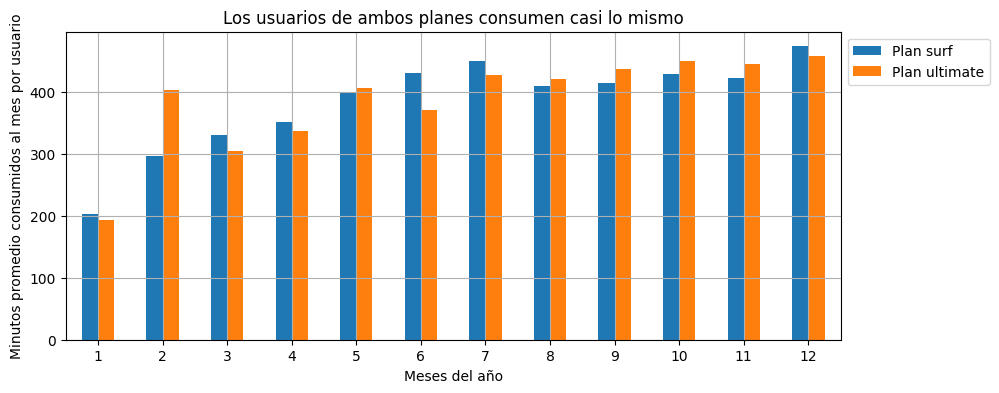

In [33]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_graph = pd.DataFrame()
#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_minutes", "plan" ] ].query( "plan == 'surf'" ).groupby( by = "month", as_index = False ).mean()
df_ultimate = df_total_values[ [ "month", "total_calls", "total_minutes", "plan" ] ].query( "plan == 'ultimate'" ).groupby( by = "month", as_index = False ).mean()

#Se crea el data frame que se va a graficar
df_graph[ "month" ] = df_surf[ "month" ]
df_graph[ "surf" ] = df_surf[ "total_minutes" ]
df_graph[ "ultimate" ] = df_ultimate[ "total_minutes" ]

#Se configura el gráfico
df_graph.plot(
    kind = 'bar',
    title = 'Los usuarios de ambos planes consumen casi lo mismo',
    x = 'month',
    y = [ "surf", "ultimate" ],
    xlabel = 'Meses del año',
    ylabel = 'Minutos promedio consumidos al mes por usuario',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ]
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ], bbox_to_anchor = [1, 1] )
plt.show()

La gráfica revela que los usuarios de ambos planes muestran un comportamiento similar, con consumos totales promedio que se mantienen bastante alineados a lo largo del año. Sin embargo, es importante destacar que el consumo aumentó de manera significativa con el paso del tiempo.

**Observaciones clave:**
- **Incremento gradual en el consumo**: En enero, el consumo promedio por usuario era de aproximadamente 200 minutos al mes.
- **Pico en diciembre**: Para diciembre, este promedio aumentó a casi 500 minutos por usuario al mes.

Este patrón indica que los usuarios están hablando cada vez más, lo que sugiere un incremento en la demanda de minutos conforme avanza el año.

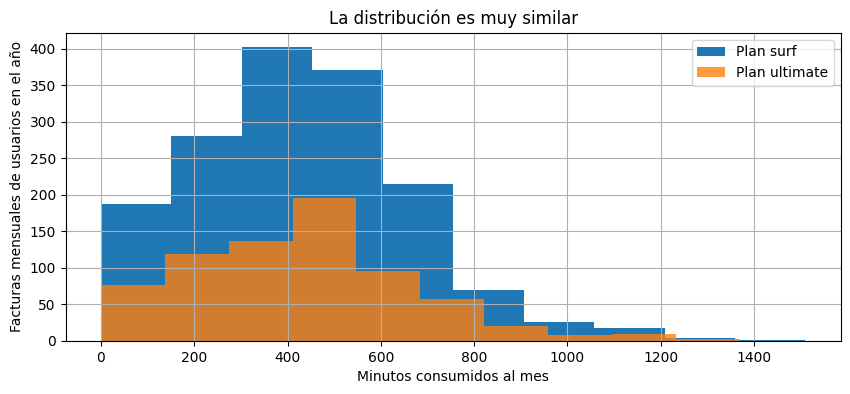

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_minutes", "plan" ] ].query( "plan == 'surf'" )
df_ultimate = df_total_values[ [ "month", "total_minutes", "plan" ] ].query( "plan == 'ultimate'" )

# Se configura el primer histograma
df_surf[ 'total_minutes' ].plot(
    kind = 'hist',
    title = 'La distribución es muy similar',
    figsize = [10,4],
    grid = True
)

# Se configura el segundo histograma
df_ultimate[ 'total_minutes' ].plot(
    kind = 'hist',
    figsize = [10,4],
    alpha = .8,
    grid = True
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ] )
plt.xlabel( 'Minutos consumidos al mes' )
plt.ylabel( 'Facturas mensuales de usuarios en el año' )

plt.show()

El histograma revela que la distribución del consumo mensual de minutos es muy similar para ambos planes, con una media cercana a los 440 minutos por mes en cada caso. Sin embargo, el histograma también destaca una diferencia significativa en el número de usuarios por plan.

**Observaciones clave:**
- **Distribución similar**: Tanto para el plan Surf como para el plan Ultimate, la media de consumo se sitúa alrededor de los 440 minutos mensuales.
- **Diferencia en el volumen de usuarios**: El histograma sugiere que hay un volumen considerablemente mayor de usuarios en el plan Surf, casi el doble en comparación con el plan Ultimate.

Esta distribución indica que, aunque los usuarios de ambos planes consumen minutos de manera similar, el plan Surf es más popular entre los clientes de Megaline.

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Se calcula la media y la varianza para el plan surf
media_surf = df_surf[ "total_minutes" ].mean()
varianza_surf = df_surf[ "total_minutes" ].var()

# Se calcula la media y la varianza para el plan ultimate
media_ultimate = df_ultimate[ "total_minutes" ].mean()
varianza_ultimate = df_ultimate[ "total_minutes" ].var()

print( f"La media del consumo mensual de minutos para el plan surf: { round( media_surf, 3 ) }" )

print( f"La varianza del consumo mensual de minutos de llamadas para el plan surf: { round( varianza_surf, 3 ) }" )

print( "/////////////////////////////////////////////////////////////////////////////////////////////" )

print( f"La media del consumo mensual de minutos para el plan ultimate: { round( media_ultimate, 3 ) }" )

print( f"La varianza del consumo mensual de minutos para el plan ultimate: { round( varianza_ultimate, 3 ) }" )


La media de la duración mensual de llamadas para el plan surf: 428.75
La varianza de la duración mensual de llamadas para el plan surf: 54968.279
/////////////////////////////////////////////////////////////////////////////////////////////
La media de la duración mensual de llamadas para el plan ultimate: 430.45
La varianza de la duración mensual de llamadas para el plan ultimate: 57844.465


**Nota:**
Como mostró el histograma anterior el consumo promedio mensualmete por usuario es de aproximadame 430 minutos

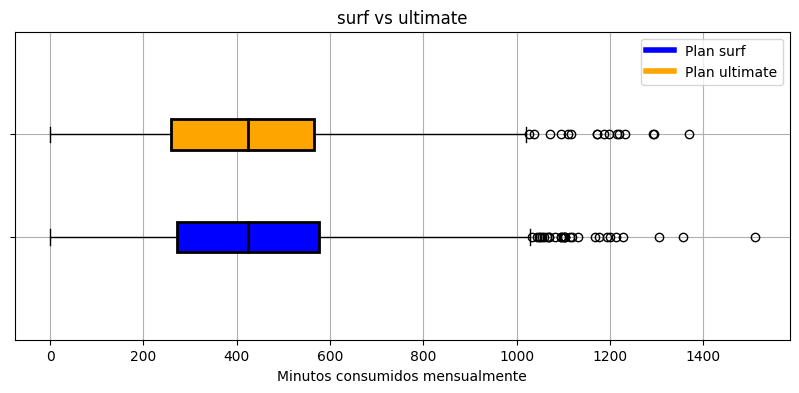

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

fig, ax = plt.subplots( figsize = [10,4] )
colors = [ 'blue', 'orange' ]

# Se configuran los diagramas de caja
boxplot = ax.boxplot( 
    [df_surf[ "total_minutes" ],df_ultimate[ "total_minutes" ]],
    positions = [ 0, .5 ],
    patch_artist = True,
    vert = False,
    medianprops = { "color" : "black", "linewidth" : 2 }
)

# Se da estilo a los diagramas de caja
for patch, color in zip( boxplot[ 'boxes' ], colors ):
    patch.set_facecolor( color )
    patch.set_edgecolor( 'black' )
    patch.set_linewidth( 2 )

#Se configura la leyenda de los diagramas
handles = [ plt.Line2D( [0], [0], color = color, lw = 4 ) for color in colors ]

ax.legend( handles, [ "Plan surf", "Plan ultimate"  ], loc = "upper right" )
ax.set_yticks( [ 0, .5 ] )
ax.set_yticklabels( [ "", "" ] )

plt.grid( True )
plt.title( "surf vs ultimate" )
plt.xlabel( "Minutos consumidos mensualmente" )
plt.show()

Después de examinar los distintos gráficos, queda claro que los usuarios de ambos planes tienen patrones de consumo muy similares. La gráfica de caja realizada anteriormente proporciona una visión más detallada: casi un 25% de las facturas pagadas por los usuarios en el año registran un consumo de entre 600 y 1000 minutos. 

**Observaciones clave:**
- **Impacto en el plan Surf**: Para los usuarios del plan Ultimate, este rango de consumo no genera cargos adicionales, ya que incluye 3000 minutos. Sin embargo, para los usuarios del plan Surf, que solo ofrece 500 minutos gratuitos, esto representa una cantidad significativa de cobros por minutos adicionales a lo largo del año.
- **Implicaciones para la rentabilidad**: Dado el número de usuarios en cada plan, este patrón de cobros adicionales sugiere que el plan Surf podría estar generando más beneficios debido a los cargos por excedentes.

Aunque estos hallazgos nos empiezan a dar una idea de cuál plan podría ser más rentable, es importante destacar que aún es prematuro llegar a una conclusión definitiva. Es necesario analizar las demás áreas, como el consumo de mensajes y datos, para obtener una imagen completa. 

### Mensajes

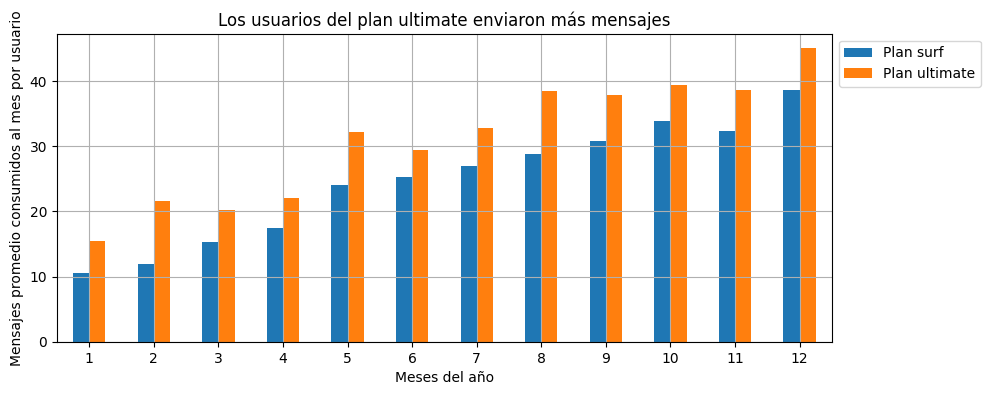

In [37]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_messages", "plan" ] ].query( "plan == 'surf'" ).groupby( by = "month", as_index = False ).mean()
df_ultimate = df_total_values[ [ "month", "total_messages", "plan" ] ].query( "plan == 'ultimate'" ).groupby( by = "month", as_index = False ).mean()

#Se crea el data frame que se va a graficar
df_graph[ "month" ] = df_surf[ "month" ]
df_graph[ "surf" ] = df_surf[ "total_messages" ]
df_graph[ "ultimate" ] = df_ultimate[ "total_messages" ] 

#Se configura el gráfico
df_graph.plot(
    kind = 'bar',
    title = 'Los usuarios del plan ultimate enviaron más mensajes',
    x = 'month',
    y = [ "surf", "ultimate" ],
    xlabel = 'Meses del año',
    ylabel = 'Mensajes promedio consumidos al mes por usuario',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ]
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ], bbox_to_anchor = [1, 1] )
plt.show()

La gráfica de barras indica que los usuarios del plan Ultimate enviaron más mensajes en promedio cada mes en comparación con los usuarios del plan Surf. Sin embargo, aunque la diferencia es clara, no es tan pronunciada.

**Observaciones clave:**
- **Diferencia en el volumen de mensajes**: Los usuarios del plan Ultimate envían más mensajes, pero los del plan Surf no están muy lejos, mostrando una actividad similar.
- **Tendencia creciente**: Al igual que con las llamadas, el número promedio de mensajes enviados por los usuarios de ambos planes aumenta a lo largo del año.

Este incremento constante en el envío de mensajes refuerza la tendencia observada en otros tipos de consumo, sugiriendo un aumento general en la actividad de los usuarios a medida que avanza el año.

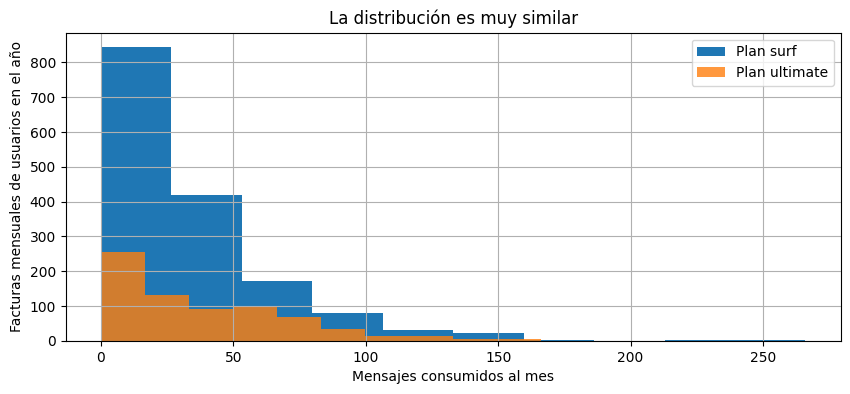

In [38]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_messages", "plan" ] ].query( "plan == 'surf'" )
df_ultimate = df_total_values[ [ "month", "total_messages", "plan" ] ].query( "plan == 'ultimate'" )

# Se configura el primer histograma
df_surf[ 'total_messages' ].plot(
    kind = 'hist',
    title = 'La distribución es muy similar',
    figsize = [10,4],
    grid = True
)

# Se configura el segundo histograma
df_ultimate[ 'total_messages' ].plot(
    kind = 'hist',
    figsize = [10,4],
    alpha = .8,
    grid = True
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ] )
plt.xlabel( 'Mensajes consumidos al mes' )
plt.ylabel( 'Facturas mensuales de usuarios en el año' )
plt.show()


El histograma muestra una distribución muy similar para ambos planes nuevamente 

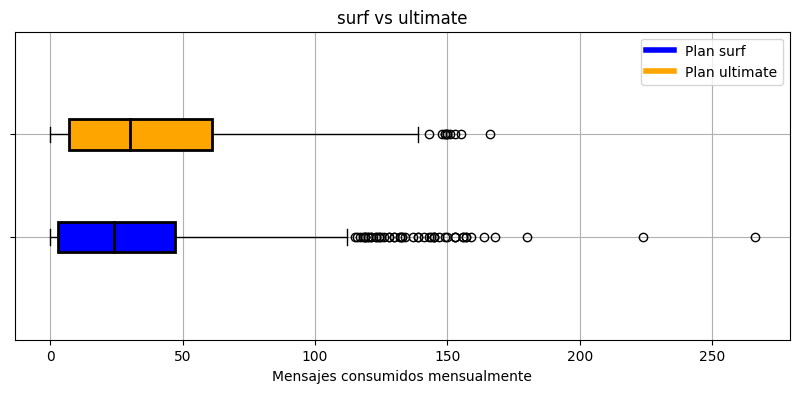

In [39]:
fig, ax = plt.subplots( figsize = [10,4] )
colors = [ 'blue', 'orange' ]

# Se configuran los diagramas de caja
boxplot = ax.boxplot( 
    [df_surf[ "total_messages" ],df_ultimate[ "total_messages" ]],
    positions = [ 0, .5 ],
    patch_artist = True,
    vert = False,
    medianprops = { "color" : "black", "linewidth" : 2 }
)

# Se da estilo a los diagramas de caja
for patch, color in zip( boxplot[ 'boxes' ], colors ):
    patch.set_facecolor( color )
    patch.set_edgecolor( 'black' )
    patch.set_linewidth( 2 )

#Se configura la leyenda de los diagramas
handles = [ plt.Line2D( [0], [0], color = color, lw = 4 ) for color in colors ]

ax.legend( handles, [ "Plan surf", "Plan ultimate"  ], loc = "upper right" )
ax.set_yticks( [ 0, .5 ] )
ax.set_yticklabels( [ "", "" ] )

plt.grid( True )
plt.title( "surf vs ultimate" )
plt.xlabel( "Mensajes consumidos mensualmente" )
plt.show()

In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Se calcula la media y la varianza para el plan surf
media_surf = df_surf[ "total_messages" ].mean()
varianza_surf = df_surf[ "total_messages" ].var()

# Se calcula la media y la varianza para el plan ultimate
media_ultimate = df_ultimate[ "total_messages" ].mean()
varianza_ultimate = df_ultimate[ "total_messages" ].var()

print( f"La media del consumo de mensajes para el plan surf: { round( media_surf, 3 ) }" )

print( f"La varianza del consumo de mensajes para el para el plan surf: { round( varianza_surf, 3 ) }" )

print( "/////////////////////////////////////////////////////////////////////////////////////////////" )

print( f"La media del consumo de mensajes para el para el plan ultimate: { round( media_ultimate, 3 ) }" )

print( f"La varianza del consumo de mensajes para el para el plan ultimate: { round( varianza_ultimate, 3 ) }" )

La media de la duración mensual de llamadas para el plan surf: 31.16
La varianza de la duración mensual de llamadas para el plan surf: 1126.725
/////////////////////////////////////////////////////////////////////////////////////////////
La media de la duración mensual de llamadas para el plan ultimate: 37.551
La varianza de la duración mensual de llamadas para el plan ultimate: 1208.757


En general los usuarios muestran un comportamiento muy similar en ambos planes, con un aumento en la demanda de servicios a lo largo del año. 

**Observaciones clave:**
- **Excedentes en el plan Surf**: Al igual que con las llamadas, aproximadamente un 25% de las facturas del plan Surf registraron un consumo que excedió los minutos incluidos en el plan. Esto generó ingresos adicionales por el cobro de minutos excedentes.
- **Plan Ultimate sin excedentes**: En contraste, los usuarios del plan Ultimate no alcanzaron, en ningún caso, el límite de mensajes incluidos, lo que significa que no hubo ingresos adicionales por excedentes en este aspecto.

Este patrón refuerza la idea de que el plan Surf podría estar generando más ingresos debido a los cargos por excedentes, mientras que el plan Ultimate proporciona una mayor tranquilidad a los usuarios al no acercarse a sus límites de consumo.

### Internet

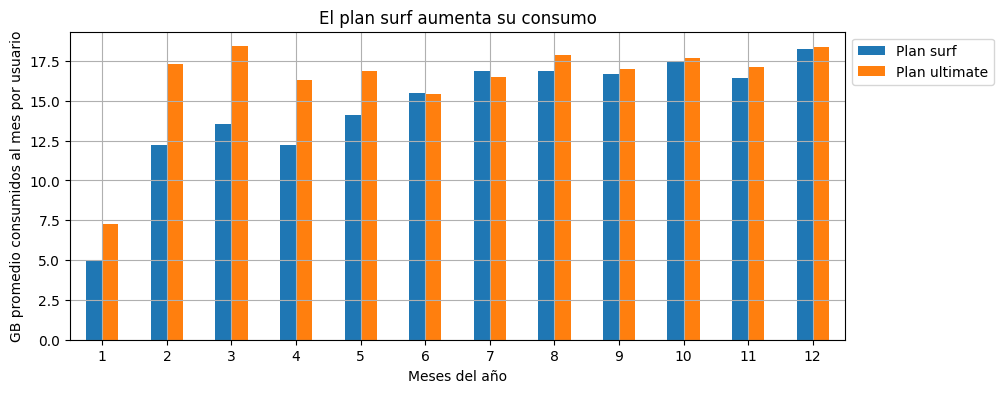

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_gb", "plan" ] ].query( "plan == 'surf'" ).groupby( by = "month", as_index = False ).mean()
df_ultimate = df_total_values[ [ "month", "total_gb", "plan" ] ].query( "plan == 'ultimate'" ).groupby( by = "month", as_index = False ).mean()

#Se crea el data frame que se va a graficar
df_graph[ "month" ] = df_surf[ "month" ]
df_graph[ "surf" ] = df_surf[ "total_gb" ]
df_graph[ "ultimate" ] = df_ultimate[ "total_gb" ] 

#Se configura el gráfico
df_graph.plot(
    kind = 'bar',
    title = 'El plan surf aumenta su consumo',
    x = 'month',
    y = [ "surf", "ultimate" ],
    xlabel = 'Meses del año',
    ylabel = 'GB promedio consumidos al mes por usuario',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ]
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ], bbox_to_anchor = [1, 1] )
plt.show()

La gráfica de barras anterior muestra que el consumo mensual promedio de GB al inicio del año era mayor para los usuarios del plan Ultimate. Sin embargo, en el mes de junio, ambos promedios se igualaron, lo que indica un aumento en el consumo por parte de los usuarios del plan Surf.

**Observaciones clave:**
- **Aumento en el consumo del plan Surf**: A partir de julio, el consumo promedio de GB en el plan Surf superó los 16 GB por usuario, manteniéndose por encima de este umbral hasta el final del año.
- **Relevancia del límite de GB**: Es importante destacar que el plan Surf incluye solo 15 GB. Esto sugiere que muchos usuarios de este plan excedieron su límite de GB, lo que podría haber generado cargos adicionales.

Este incremento sostenido en el consumo de GB entre los usuarios del plan Surf sugiere una mayor demanda de datos, lo que podría haber resultado en ingresos adicionales debido a los excedentes, similar a lo observado con los minutos de llamada.

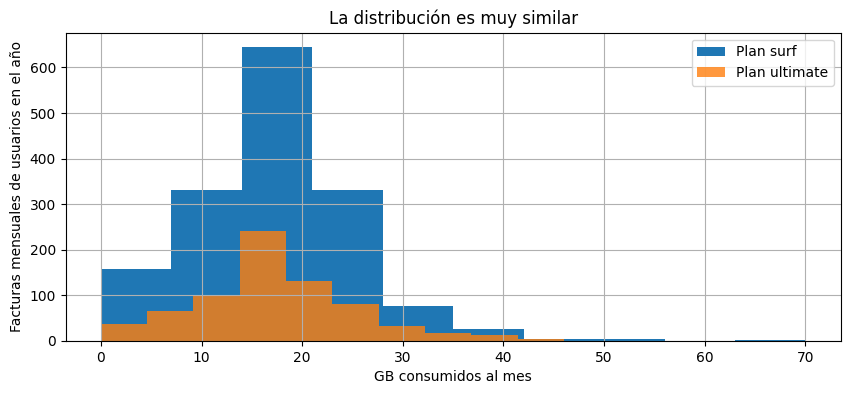

In [42]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "total_gb", "plan" ] ].query( "plan == 'surf'" )
df_ultimate = df_total_values[ [ "month", "total_gb", "plan" ] ].query( "plan == 'ultimate'" )

# Se configura el primer histograma
df_surf[ 'total_gb' ].plot(
    kind = 'hist',
    title = 'La distribución es muy similar',
    figsize = [10,4],
    grid = True
)

# Se configura el segundo histograma
df_ultimate[ 'total_gb' ].plot(
    kind = 'hist',
    figsize = [10,4],
    alpha = .8,
    grid = True
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ] )
plt.xlabel( 'GB consumidos al mes' )
plt.ylabel( 'Facturas mensuales de usuarios en el año' )
plt.show()

Este histograma muestra que de igual forma la distribución es muy parecida en ambos planes

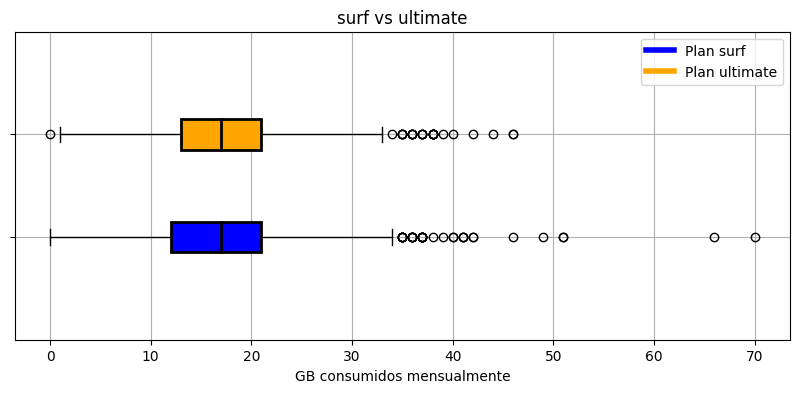

In [43]:
fig, ax = plt.subplots( figsize = [10,4] )
colors = [ 'blue', 'orange' ]

# Se configuran los diagramas de caja
boxplot = ax.boxplot( 
    [df_surf[ "total_gb" ],df_ultimate[ "total_gb" ]],
    positions = [ 0, .5 ],
    patch_artist = True,
    vert = False,
    medianprops = { "color" : "black", "linewidth" : 2 }
)

# Se da estilo a los diagramas de caja
for patch, color in zip( boxplot[ 'boxes' ], colors ):
    patch.set_facecolor( color )
    patch.set_edgecolor( 'black' )
    patch.set_linewidth( 2 )

#Se configura la leyenda de los diagramas
handles = [ plt.Line2D( [0], [0], color = color, lw = 4 ) for color in colors ]

ax.legend( handles, [ "Plan surf", "Plan ultimate"  ], loc = "upper right" )
ax.set_yticks( [ 0, .5 ] )
ax.set_yticklabels( [ "", "" ] )

plt.grid( True )
plt.title( "surf vs ultimate" )
plt.xlabel( "GB consumidos mensualmente" )
plt.show()

In [44]:
# Se calcula la media y la varianza para el plan surf
media_surf = df_surf[ "total_gb" ].mean()
varianza_surf = df_surf[ "total_gb" ].var()

# Se calcula la media y la varianza para el plan ultimate
media_ultimate = df_ultimate[ "total_gb" ].mean()
varianza_ultimate = df_ultimate[ "total_gb" ].var()

print( f"La media del consumo mensual de gb para el plan surf: { round( media_surf, 3 ) }" )

print( f"La varianza del consumo mensual de gb para el plan surf: { round( varianza_surf, 3 ) }" )

print( "/////////////////////////////////////////////////////////////////////////////////////////////" )

print( f"La media del consumo mensual de gb para el plan ultimate: { round( media_ultimate, 3 ) }" )

print( f"La varianza del consumo mensual de gb para el plan ultimate: { round( varianza_ultimate, 3 ) }" )

La media del consumo mensual de gb para el plan surf: 16.671
La varianza del consumo mensual de gb para el plan surf: 61.584
/////////////////////////////////////////////////////////////////////////////////////////////
La media del consumo mensual de gb para el plan ultimate: 17.307
La varianza del consumo mensual de gb para el plan ultimate: 58.831


Es evidente que el comportamiento de los usuarios en ambos planes es muy similar. Sin embargo, un aspecto notable es el impacto de los excedentes en el plan Surf, según lo demostrado por la gráfica de caja anterior.

**Observaciones clave:**
- **Excedentes en el plan Surf**: Alrededor del 50% de las facturas del plan Surf a lo largo del año superaron los 15 GB incluidos de forma gratuita en el plan. Esto representa un potencial significativo de ingresos adicionales por el cobro de excedentes.
- **Estabilidad en el plan Ultimate**: En contraste, el consumo promedio de GB en el plan Ultimate se mantuvo muy por debajo del límite gratuito de 30 GB. La gráfica de caja muestra que solo un pequeño número de facturas en el año excedieron este límite.

Estos hallazgos destacan que, aunque ambos planes tienen patrones de uso similares, el plan Surf genera más ingresos por excedentes, mientras que el plan Ultimate ofrece a los usuarios mayor estabilidad y previsibilidad en sus facturas.

## Ingreso

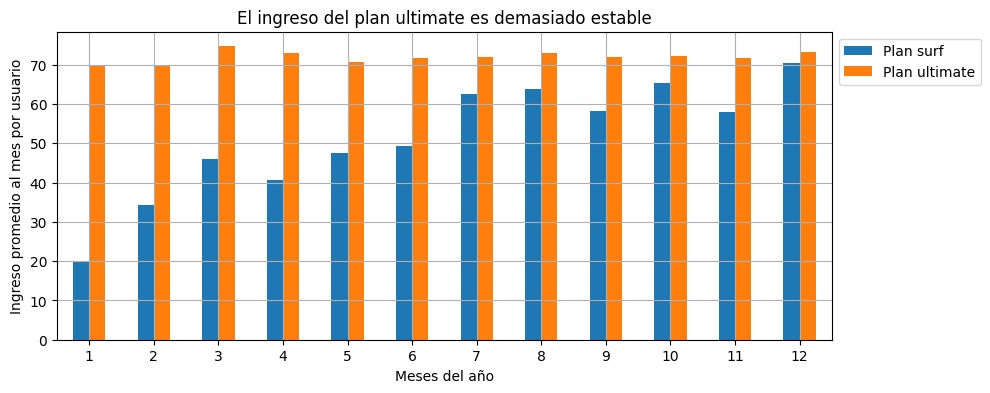

In [45]:
#se separan los datos del dataframe principal para facilitar su manipulación
df_surf = df_total_values[ [ "month", "income", "plan" ] ].query( "plan == 'surf'" ).groupby( by = "month", as_index = False ).mean()
df_ultimate = df_total_values[ [ "month", "income", "plan" ] ].query( "plan == 'ultimate'" ).groupby( by = "month", as_index = False ).mean()

#Se crea el data frame que se va a graficar
df_graph[ "month" ] = df_surf[ "month" ]
df_graph[ "surf" ] = df_surf[ "income" ]
df_graph[ "ultimate" ] = df_ultimate[ "income" ] 

#Se configura el gráfico
df_graph.plot(
    kind = 'bar',
    title = 'El ingreso del plan ultimate es demasiado estable',
    x = 'month',
    y = [ "surf", "ultimate" ],
    xlabel = 'Meses del año',
    ylabel = 'Ingreso promedio al mes por usuario',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ]
)

plt.legend( [ 'Plan surf', 'Plan ultimate' ], bbox_to_anchor = [1, 1] )
plt.show()

La gráfica revela que el ingreso promedio por usuario en el plan Ultimate se mantiene muy estable a lo largo del año, situándose cerca de los 70 dólares de manera constante.

**Observaciones clave:**
- **Estabilidad en el plan Ultimate**: El ingreso promedio por usuario en el plan Ultimate muestra poca variación, manteniéndose cerca de 70 dólares durante todo el año.
- **Incremento en el plan Surf**: En contraste, el ingreso promedio por usuario del plan Surf aumenta de manera continua a lo largo del año. 

Adicionalmente, dado que el plan Surf cuenta con casi el doble de usuarios en comparación con el plan Ultimate, este incremento en el ingreso promedio por usuario sugiere que el plan Surf generó significativamente más ingresos durante el año. Este análisis sugiere que, a pesar de los ingresos estables del plan Ultimate, el plan Surf es el que probablemente contribuyó más a los ingresos totales de Megaline.

In [46]:

# Se calcula la media y la varianza para el plan surf
media_surf = df_surf[ "income" ].mean()
varianza_surf = df_surf[ "income" ].var()

# Se calcula la media y la varianza para el plan ultimate
media_ultimate = df_ultimate[ "income" ].mean()
varianza_ultimate = df_ultimate[ "income" ].var()

print( f"La media del ingreso promedio por usuario del plan surf: { round( media_surf, 3 ) }" )

print( f"La varianza del ingreso promedio por usuario del plan surf: { round( varianza_surf, 3 ) }" )

print( "/////////////////////////////////////////////////////////////////////////////////////////////" )

print( f"La media del ingreso promedio por usuario del plan ultimate: { round( media_ultimate, 3 ) }" )

print( f"La varianza del ingreso promedio por usuario del plan ultimate: { round( varianza_ultimate, 3 ) }" )

La media del ingreso promedio por usuario del plan surf: 51.401
La varianza del ingreso promedio por usuario del plan surf: 216.039
/////////////////////////////////////////////////////////////////////////////////////////////
La media del ingreso promedio por usuario del plan ultimate: 72.011
La varianza del ingreso promedio por usuario del plan ultimate: 1.861


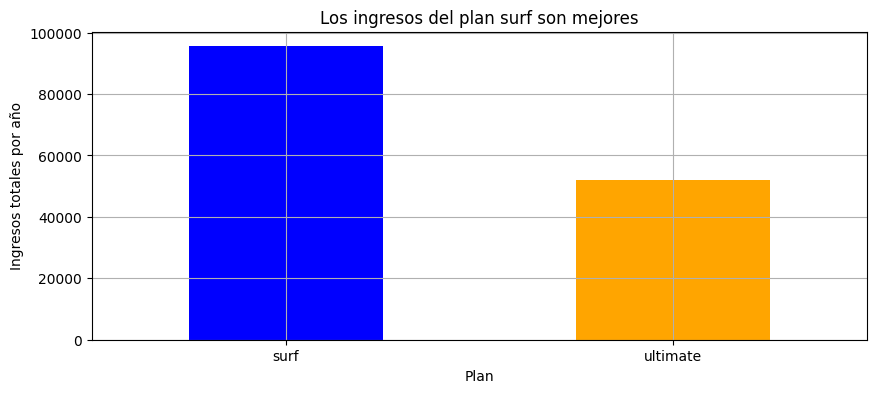

In [47]:

#Se crea el data frame que se va a graficar
df_graph = df_total_values[ [ "income", "plan" ] ].groupby( by = "plan", as_index = False ).sum()

# Se configura el grafico
df_graph.plot(
    kind = 'bar',
    title = 'Los ingresos del plan surf son mejores',
    x = 'plan',
    y = "income",
    xlabel = 'Plan',
    ylabel = 'Ingresos totales por año',
    grid = True,
    rot = 0,
    figsize = [ 10, 4 ],
    color = [ "blue", "orange" ]
    
)


plt.legend().set_visible( False )
plt.show()

Tras analizar los datos, queda claro que el plan Surf generó más ingresos a lo largo del año en comparación con el plan Ultimate. Aunque el ingreso promedio por usuario del plan Surf es algo inferior, el número de usuarios de este plan es casi el doble en comparación con el plan Ultimate.

**Razones clave para el mayor ingreso del plan Surf:**
1. **Hábitos de consumo similares**: Los patrones de consumo de minutos, mensajes y GB son bastante similares entre los usuarios de ambos planes.
2. **Cobro de excedentes**: El plan Surf tiene un cobro de excedentes más elevado en comparación con el plan Ultimate. Esto crea un entorno propicio para un incremento significativo en el ingreso promedio por usuario.

A pesar de que el ingreso promedio por usuario del plan Surf es de 51 dólares, frente a los 70 dólares del plan Ultimate, el gran número de usuarios del plan Surf resulta en mayores ingresos totales. Este favoritismo hacia el plan Surf puede deberse a la percepción de pagar menos, aunque esta razón no puede ser confirmada con la información actual.

En conclusión, el plan Surf es el más rentable para Megaline, principalmente debido a su mayor base de usuarios y los ingresos adicionales por excedentes, a pesar de tener un ingreso promedio por usuario menor que el plan Ultimate.

## Prueba las hipótesis estadísticas

- **Hipótesis nula (H₀)**: Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son iguales.

- **Hipótesis alternativa (H₁)**: Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son diferentes.

In [48]:
# Prueba las hipótesis

df_surf = df_total_values[ [ "month", "income", "plan" ] ].query( "plan == 'surf'" ).groupby( by = "month", as_index = False ).mean()
df_ultimate = df_total_values[ [ "month", "income", "plan" ] ].query( "plan == 'ultimate'" ).groupby( by = "month", as_index = False ).mean()

alpha = .05
results = stats.ttest_ind( df_surf[ "income" ], df_ultimate[ "income" ], equal_var = False )

print( f"p_value: {results.pvalue}" )

if results.pvalue < alpha:
    print( "Rechazamos la hipótesis nula" )
else:
    print( "No podemos rechazar la hipotesis nula" )


p_value: 0.0004970238953490146
Rechazamos la hipótesis nula


- **Hipótesis nula (H₀)**: El ingreso promedio de los usuarios del área de NY-NJ-PA no es diferente al de los usuarios de otras regiones.

- **Hipótesis alternativa (H₁)**: El ingreso promedio de los usuarios del área de NY-NJ-PA es diferente al de los usuarios de otras regiones.

In [49]:
# Prueba las hipótesis
df_ny_nj = df_total_values[ [ "area", "income" ] ].query( "area == 'NY-NJ-PA'" )
df_others = df_total_values[ [ "area", "income" ] ].query( "area != 'NY-NJ-PA'" )

alpha = .05

results = stats.ttest_ind( df_ny_nj[ "income" ], df_others[ "income" ], equal_var = False )

print( f"p_value: {results.pvalue}" )

if results.pvalue < alpha:
    print( "Rechazamos la hipótesis nula" )
else:
    print( "No podemos rechazar la hipotesis nula" )
    

p_value: 0.043557431621342436
Rechazamos la hipótesis nula


## Conclusión general

1. **Comparación de Consumo**:
   - Los patrones de consumo de minutos, mensajes y GB muestran similitudes generales entre los usuarios de ambos planes, con un aumento constante en el uso a lo largo del año.
   - El plan Surf, a pesar de tener un ingreso promedio por usuario ligeramente inferior (51 dólares frente a 70 dólares del plan Ultimate), cuenta con casi el doble de usuarios, lo que contribuye a un mayor ingreso total.

2. **Ingresos por Excedentes**:
   - Para el plan Surf, cerca del 25% de las facturas exceden el límite de minutos incluidos, generando ingresos adicionales significativos. En contraste, el plan Ultimate no presenta cargos adicionales por mensajes, ya que los usuarios rara vez alcanzan el límite gratuito.

3. **Rentabilidad del Plan Surf**:
   - El análisis revela que, a pesar de un ingreso promedio por usuario menor, el plan Surf es el más rentable para Megaline debido a su mayor número de usuarios y los ingresos adicionales por excedentes. Esta mayor rentabilidad se ve reflejada en los ingresos totales generados por el plan Surf a lo largo del año.

4. **Preferencias de los Usuarios**:
   - La preferencia por el plan Surf podría estar relacionada con la percepción de pagar menos, aunque esta hipótesis no puede ser confirmada con los datos actuales. El elevado número de usuarios en el plan Surf sugiere que este plan ofrece una mayor percepción de valor entre los clientes.

5. **Prueba de Hipótesis**:
   - **Hipótesis sobre los Ingresos de los Planes**: La hipótesis nula que afirmaba que los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" eran iguales fue rechazada. Esto indica que existe una diferencia significativa en los ingresos promedio entre los dos planes.
   - **Hipótesis sobre Ingresos Regionales**: La hipótesis nula que afirmaba que el ingreso promedio de los usuarios del área de NY-NJ no era diferente al de los usuarios de otras regiones también fue rechazada. Esto sugiere que hay una diferencia en el ingreso promedio entre los usuarios de NY-NJ y los de otras regiones.

En resumen, el plan Surf, con su mayor base de usuarios y el cobro de excedentes, resulta ser el plan más rentable para Megaline. A pesar de tener un ingreso promedio por usuario menor en comparación con el plan Ultimate, su capacidad para generar ingresos adicionales y su popularidad entre los usuarios lo convierten en la opción más beneficiosa desde el punto de vista financiero. Además, las pruebas de hipótesis indican que existen diferencias significativas tanto en los ingresos promedio entre los dos planes como entre los usuarios de distintas regiones.